Part A


In [ ]:
#importing the necessary libraries:
import os
import zipfile
from zipfile import ZipFile

In [ ]:
extract_source = ZipFile('/content/drive/MyDrive/CATDOG.zip')   #taking in the zip file

In [ ]:
extracted = extract_source.extractall()  #extracting the zip file

In [ ]:
os.listdir('/content/CATDOG')   #looking into directory of the folder

['training_set', 'test_set']

In [ ]:
test_path = '/content/CATDOG'+'/test_set/' 
train_path = '/content/CATDOG'+'/training_set/'      #seting training and testing path

In [ ]:
os.listdir(test_path), os.listdir(train_path)        #listing folders in the directory

(['dogs', 'cats'], ['dogs', 'cats'])

In [ ]:
#importing more libraries that are neessary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2

In [ ]:
test_path+'dogs/'+os.listdir(test_path+'/dogs/')[0]    #selecting a random image from folder dogs of test directory

'/content/CATDOG/test_set/dogs/dog.4157.jpg'

In [ ]:
sample_cv = cv2.imread(test_path+'dogs/'+os.listdir(test_path+'/dogs/')[0])   #using cv2 library to pickup an image 
sample_cv = cv2.cvtColor(sample_cv,cv2.COLOR_BGR2RGB)       #correcting color channel

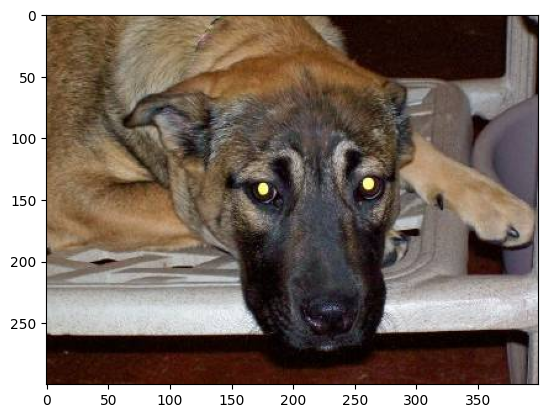

In [ ]:
plt.imshow(sample_cv)       #showing the image using plt

In [ ]:
from matplotlib.image import imread    #importing imread 

In [ ]:
sample_mat = imread(test_path+'cats/'+os.listdir(test_path+'/cats/')[4])   #selecting random picture and giving name sample_mat

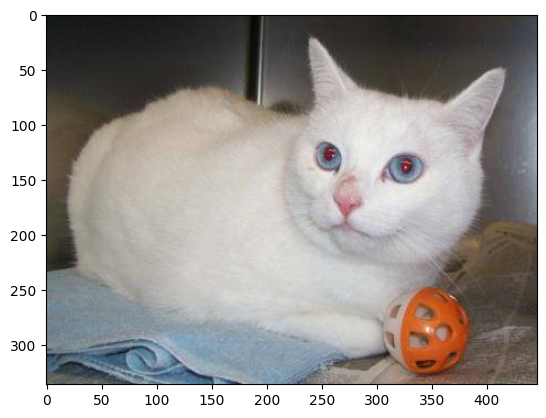

In [ ]:
plt.imshow(sample_mat)     #showing that image

In [ ]:
sample_mat.shape  #showing shape of that image

(336, 446, 3)

In [ ]:
#create empty lists
dim_x = []     
dim_y = []
channel = []
 
#use for loop in test directory's dogs folder 
for i in os.listdir(test_path+'dogs'):
  sample = imread(test_path + 'dogs/'+i)
  
#adding shape sizes in respective lists
  dim_x.append(sample.shape[0])
  dim_y.append(sample.shape[1])
  channel.append(sample.shape[2])

In [ ]:
min(channel), max(channel)   #checking the color of the images

(3, 3)

In [ ]:
min(dim_x), max(dim_x)  #chacking the width of the images

(33, 500)

In [ ]:
min(dim_y), max(dim_y)  #checking height of the images

(92, 500)

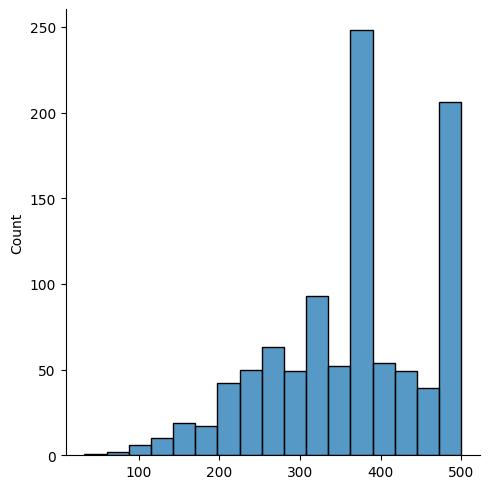

In [ ]:
sns.displot(dim_x)    #this shows that the images are of different sizes

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #importing IDG

In [ ]:
#importing other libraries that we will be using

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#making instance of IDG

IDG = ImageDataGenerator(width_shift_range= 0.3, #width manipulation
                         height_shift_range=0.1,
                         rotation_range=50,
                         rescale = 1/255,
                         horizontal_flip =True,
                         fill_mode= 'nearest')

In [ ]:
a=imread('/content/CATDOG/test_set/cats/cat.4001.jpg')  #selecting random image and naming it a

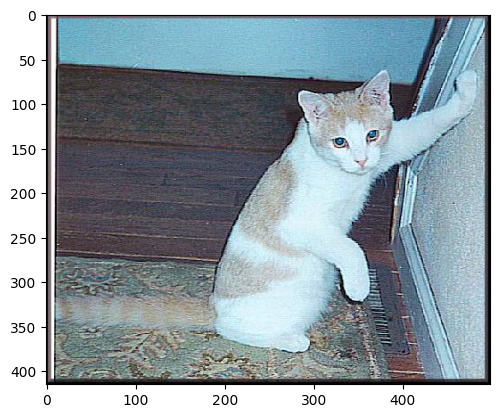

In [ ]:
plt.imshow(a)

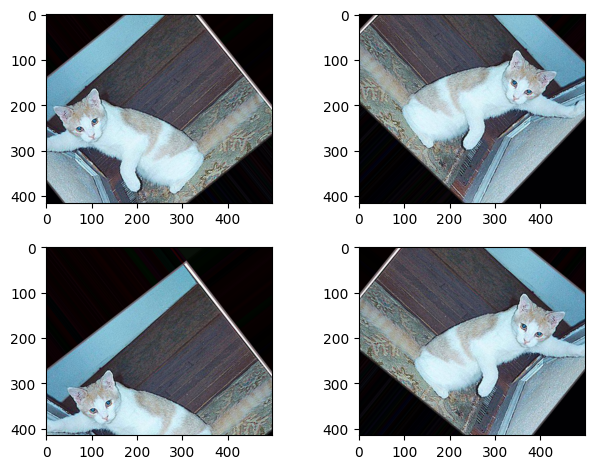

In [ ]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

#applying IDG to the image a

ax[0][0].imshow(IDG.random_transform(a))
ax[0][1].imshow(IDG.random_transform(a))
ax[1][1].imshow(IDG.random_transform(a))
ax[1][0].imshow(IDG.random_transform(a))

In [ ]:
IDG.flow_from_directory(train_path)   #using flow from directory for training data

Found 8020 images belonging to 2 classes.


In [ ]:
IDG.flow_from_directory(test_path)        #using flow from directory for testing data

Found 2000 images belonging to 2 classes.


In [ ]:
#creating sequntial model 

model = Sequential()  

model.add(Conv2D(filters = 64,
                 kernel_size=(3,3),
                 input_shape =(224,224,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,
                 kernel_size=(3,3),
                 activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
#creating patience threshold
es = EarlyStopping(monitor='val_loss',patience=4)

In [ ]:
#giving entire test and train directory to IDG

test_data_IDG=IDG.flow_from_directory(test_path, 
                                    target_size = (224,224),
                                    color_mode='rgb',
                                    batch_size=100,
                                    class_mode='binary',
                                   shuffle=False)

train_data_IDG=IDG.flow_from_directory(train_path, 
                                    target_size = (224,224),
                                    color_mode='rgb',
                                    batch_size=100,
                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 8020 images belonging to 2 classes.


In [ ]:
test_data_IDG.class_indices    #checking class in test data

{'cats': 0, 'dogs': 1}

In [ ]:
train_data_IDG.class_indices    #checking class in train data

{'cats': 0, 'dogs': 1}

In [ ]:
#training the model

fitted_model =model.fit_generator(train_data_IDG, 
                               epochs=10,
                               validation_data=test_data_IDG,
                               callbacks=[es])

<ipython-input-33-c2a0edf3be72>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted_model =model.fit_generator(train_data_IDG,


Epoch 1/10
81/81 [==============================] - 1322s 16s/step - loss: 0.7018 - accuracy: 0.5212 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 2/10
81/81 [==============================] - 1341s 17s/step - loss: 0.6901 - accuracy: 0.5314 - val_loss: 0.6911 - val_accuracy: 0.5200
Epoch 3/10
81/81 [==============================] - 1329s 16s/step - loss: 0.6768 - accuracy: 0.5752 - val_loss: 0.6516 - val_accuracy: 0.6205
Epoch 4/10
20/81 [======>.......................] - ETA: 15:48 - loss: 0.6638 - accuracy: 0.6045

In [ ]:
pd.DataFrame(model.history.history)[['val_loss','loss']].plot()   #plotting value loss and loss using 

In [ ]:
pd.DataFrame(model.history.history)[['val_accuracy','accuracy']].plot()   #plotting value accuracy and accuracy

In [ ]:
prediction = model.predict_generator(test_data_IDG)   #prediciting using model and naming it prediction     

In [ ]:
prediction   #these are probabilities

In [ ]:
prediction = prediction>0.5   #setting threshold

In [ ]:
test_data_IDG.classes    #calling classes in test data

In [ ]:
prediction    #seeing prediction made

In [ ]:
(test_data_IDG.classes,prediction)   #seeing which predicitons are right and wrong

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix   #importing other libraries

In [ ]:
print(classification_report(test_data_IDG.classes, prediction))    #giving classificaiton report

In [ ]:
confusion_matrix(test_data_IDG.classes, prediction) #making confusion matrix

Part B

In [ ]:
#importing necessary libraries
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/cw3_housing_data_part_b.xlsx')   #reading excel file naming it df

In [ ]:
df.head()   #calling five entries

In [ ]:
df.columns   #calling for columns

In [ ]:
df.shape  #showing shape

In [ ]:
df.describe()     #looking into mathematical aspec

In [ ]:
sns.displot(df['price'], bins = 20)   #plotting prices of houses 

In [ ]:
sns.heatmap(df.corr(), cmap='PuBu')   #plotting heat map for correlation

Linear Regression

In [ ]:
df.columns

In [ ]:
X = df [['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]    #selecting X

In [ ]:
X   #calling X

In [ ]:
y = df['price']   #selecting y
y   #calling y

In [ ]:
#giving shapes of X and y
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split   #importing train, test , split traing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 )  #splitting testing and training data

In [ ]:
X_train.shape  #training data shape

In [ ]:
X_test.shape   #testingdata shape

In [ ]:
y_train.shape     #training data shape

In [ ]:
y_test.shape      #testingdata shape

In [ ]:
from sklearn.linear_model import LinearRegression  #importing linear regression

In [ ]:
Linear = LinearRegression()   #making instance

In [ ]:
Linear.fit(X_train, y_train)    #training the model

In [ ]:
Linear.coef_   #looking at coefficients

In [ ]:
pd.DataFrame(Linear.coef_,index=X.columns, columns=['Coeff'])  #coeff for individual columns

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  #importing r2 score and mean squared error

In [ ]:
y_preds=Linear.predict(X_test)   #testing model

In [ ]:
y_preds    #PREDICTION  made by model

In [ ]:
y_preds.shape  #shape of predictions

In [ ]:
y_test.shape  #shape of test data

In [ ]:
r2_score(y_preds,y_test)  #calculating r2 score

In [ ]:
mean_squared_error(y_preds,y_test)   #calculating mean squared error

SVR

In [ ]:
df.head(5)   #calling first five entries

In [ ]:
df.columns  #calling columns

In [ ]:
sns.displot(df['price'], bins=10)  #visualising the prices

In [ ]:
X  #calling X from above

In [ ]:
y  #calling y from above

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler   #importing saclers

In [ ]:
#making instance of MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
#scaler_x = StandardScaler()
#scaler_y = StandardScaler()

In [ ]:
X.shape, y.shape  #calling X shape and y shape

In [ ]:
y = np.array(y)   #converting y to array

In [ ]:
X_scaled = scaler_x.fit_transform(X)                #transforming X and fitting it to make it standard

y_scaled = scaler_y.fit_transform(y.reshape(-1,1))  #transforming y and fitting it to make it standard by reshaping it to (-1,1)

In [ ]:
X_scaled  #calling X_scaled

In [ ]:
from sklearn.svm import SVR

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=43)

In [ ]:
#LR_svr = SVR(kernel='rbf', gamma=1, C=2, epsilon=0.1)  #Making instance of SVR with option to change hyper parameter
                                                        #we are using the gaussian radial basis kernel
LR_svr=SVR(kernel='rbf',C=1,epsilon=0.1)
LR_svr.fit(X_train_scaled, y_train_scaled)    #fitting data to model

In [ ]:
y_svr_preds = LR_svr.predict(X_test_scaled)  #making prediction with trained model

In [ ]:
mean_squared_error(y_svr_preds,y_test_scaled)    #calcualting mean squared error for our model

In [ ]:
r2_score(y_svr_preds,y_test_scaled)               #calculating r2 score for our model

Decision Tree

In [ ]:
df.head()  #calling first 5 entries in df

In [ ]:
y_train.shape, y_test.shape

In [ ]:
from sklearn.tree import DecisionTreeRegressor    #importing Decsison Tree Regressor

In [ ]:
LR_tree = DecisionTreeRegressor(ccp_alpha=0.0002)   #making instance of decision tree
#LR_tree = DecisionTreeRegressor() 

In [ ]:
LR_tree.fit(X_train, y_train)   #trainign the model

In [ ]:
yt_preds=LR_tree.predict(X_test)   #testing the model

In [ ]:
mean_squared_error(yt_preds, y_test)  #calculating the mean squared error

In [ ]:
r2_score(yt_preds, y_test)  #calculating the r2 score

Random Forrest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor  #importing random forrest

In [ ]:
LR_forest= RandomForestRegressor(n_estimators=60)  #making instance for model with 60 trees in a forest

In [ ]:
LR_forest.fit(X_train, y_train)    #traingn the model

In [ ]:
yf_preds = LR_forest.predict(X_test)   #testing model

In [ ]:
mean_squared_error(yf_preds, y_test)   #calculating the mean squared error

In [ ]:
r2_score(yf_preds, y_test)   #calculating the r2 score

Squential API

In [ ]:
#importing libraries

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
scaler = StandardScaler()     #making instance of standard scaler
scaler.fit(X_train)           #scaling trainng data with standard scaler

In [ ]:
#tranforming training and testing daat
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)


In [ ]:
X_train_scal.shape

In [ ]:
#making model 

_APImodel = Sequential()
_APImodel.add(Dense(128, input_dim=18, activation = 'relu'))
_APImodel.add(Dense(64, activation='relu'))

_APImodel.add(Dense(1, activation='linear'))

_APImodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


In [ ]:
#training model
fit_modelAPI = _APImodel.fit(X_train_scaled, y_train_scaled, validation_split=0.2, epochs =20)

In [ ]:
#testing model
yAPI_preds = _APImodel.predict(X_test_scal)  

In [ ]:
mean_squared_error(yAPI_preds, y_test)    #calculating the mean squared error

In [ ]:
r2_score(yAPI_preds, y_test)  #calculating the r2 score

From here, we see that Decision tree regressor and random Forest regressor perform the best among all the models. 